# How to use Keyence API

In [1]:
from KeyenceProfilo import Keyence
# from KeyenceProfilo.KeyenceProfilo import Keyence # Use this line if your jupyter notebook is outside of the class folder

import time
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## 1 - Instanciation of the Keyence profilometer
if 'Keyence connected' written it's OK !

In [2]:
K = Keyence(ip_address='192.168.0.1')

Keyence DLL version:  1 2 0 0
Keyence connected


## 2 - Getting one profile at a time
if you pass a list of 2 names in arguments, then profiles will be saved in a csv file

In [3]:
z_profile, grey_profile = K.get_profile([r'.\datas\test_profil_1shot_Z.csv', r'.\datas\test_profil_1shot_gray.csv'])

### reading the profile with matplotlib

profile length: 3200 points
[-2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648] [-2.14748365e+09 -2.14748365e+09 -2.14748365e+09 -2.14748365e+09
 -2.14748365e+09 -2.14748365e+09 -2.14748365e+09 -2.14748365e+09
 -2.14748365e+09 -2.14748365e+09]


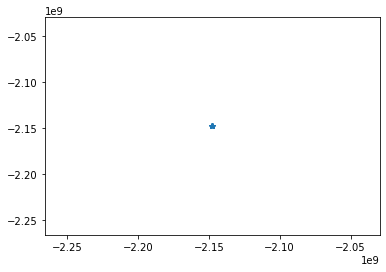

In [11]:
print(f'profile length: {len(z_profile)} points')
z_profile_back = np.loadtxt(r'.\datas\test_profil_1shot_Z.csv',delimiter=';')
#plt.plot(z_profile)
plt.plot(z_profile[0:10],z_profile_back[0:10],'*')

print(z_profile[0:10],z_profile_back[0:10])

## 3 - High Speed mode acquisition
if you pass a list of 2 names in arguments, then profiles will be saved in a csv file

In [14]:
# 1. Start High Speed acquisition
filename = [r'.\datas\test_profil_matrix_Z_laser.csv', r'.\datas\test_profil_matrix_gray_laser.csv']
K.HS_start_acquisition(filename=filename)

# 2. Move the element
time.sleep(5)

# 3. Stop the acquisition
K.HS_stop_acquisition()
HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles()
print(HS_array_profiles_Gray.shape)

(5120, 3200)


### reading a certain spectra from the whole set

(1166, 3200) (1166, 3200)


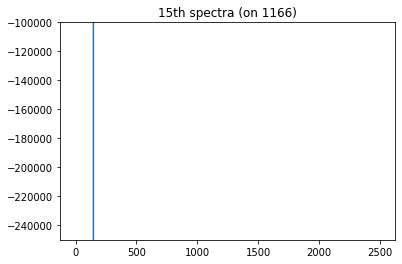

In [4]:
n = 15      # number of the spectra to read
plt.plot(HS_array_profiles_Z[n][0:2500])
plt.ylim([-250_000,-100_000])   # adujst zoom to your needs
plt.title(f'{n}th spectra (on {len(HS_array_profiles_Z)})')
print(HS_array_profiles_Z.shape,HS_array_profiles_Gray.shape)



In [13]:
import pandas as pd
Z_profiles = np.loadtxt(r'.\datas\test_profil_matrix_Z.csv',delimiter=';')
Gray_profiles = np.loadtxt(r'.\datas\test_profil_matrix_Gray.csv',delimiter=';')
print(Gray_profiles.shape,Z_profiles.shape)

(227, 3200) (227, 3200)


### reading all spectra as an image

Raw image size: 5126, 3200
Raw image grey level min, max: -2147483648.0, -148650.0
reversed image grey level min, max: 0.0, 2147334998.0
normalized image grey level min, max: 0, 255


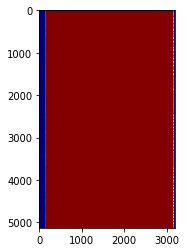

In [62]:
img = HS_array_profiles_Z.copy()
print(f'Raw image size: {img.shape[0]}, {img.shape[1]}')
print(f'Raw image grey level min, max: {img.min()}, {img.max()}')

# Image normalization to 8 bits
img_reverse = img - img.min()
print(f'reversed image grey level min, max: {img_reverse.min()}, {img_reverse.max()}')
img_norm = img_reverse / np.linalg.norm(img_reverse)
img_normalized = np.array(255*img_norm / img_norm.max(), dtype='uint8')
print(f'normalized image grey level min, max: {img_normalized.min()}, {img_normalized.max()}')

Image.fromarray(img_normalized).save(r'.\datas\z_image.jpg')
plt.imshow(img_normalized, cmap='jet')

### reading all grey levels as an image

Raw image size: 5120, 3200
Raw image grey level min, max: 0.0, 849.0


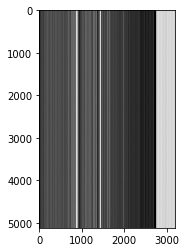

In [15]:
img = HS_array_profiles_Gray
print(f'Raw image size: {img.shape[0]}, {img.shape[1]}')
print(f'Raw image grey level min, max: {img.min()}, {img.max()}')

# Image normalization to 8 bits
img_normalized = np.array(255*img / img.max(), dtype='uint8')

Image.fromarray(img_normalized).save(r'.\grey_level_image.jpg')
plt.imshow(img_normalized, cmap='gray')

### if you want to get the temperatures

In [3]:
t1, t2, t3 = K.get_temperatures()
print(f't1: {t1}°C, t2: {t2}°C, t3: {t3}°C')

t1: 37.93°C, t2: 41.87°C, t3: 35.0°C


In [23]:
#Test frequency
T = 15
n_spectra = HS_array_profiles_Gray_bis.shape[0]
print('freq' ,n_spectra/15, 'expected frequency ~ :',1000)


freq 1009.2 expected frequency ~ : 1000


In [24]:
HS_array_profiles_Gray.max()

972.0

In [11]:
print(HS_array_profiles_Gray_bis.max())

255


In [7]:
HS_array_profiles_Z_bis = np.array(HS_array_profiles_Z)
type(HS_array_profiles_Z_bis)
Image.fromarray(HS_array_profiles_Z_bis).save('test_tristan1_Z.jpeg')

OSError: cannot write mode F as JPEG